Сделаем классификацию с помощью ResNet50, EfficientNetB0, MobileNetV2 и VGG16.
Они принимают картинку (224x224) и предсказывают к какому классу она относится. У нас 7 классов кожных заболеваний.
Оставим все 7, НО:

в группу риска отнесём:
*   Меланома (mel) — самая опасная, требует срочной диагностики.
*   Базально-клеточная карцинома (bcc) — редко метастазирует, но локально разрушает ткани.
*   Актинический кератоз (akiec)— требует наблюдения, так как может прогрессировать в рак.

Все остальные доброкачественные.



In [6]:
!ls

drive  HAM10000  kaggle-2.json	sample_data


Загружать датасет с сайта кагл напрямую не получилось(как раньше). Что-то там сломалось и не работает.
Пришлось скачать датасет на ноутбук, сжать в зип архив. Потом загрузить его на свой гугл диск(т.к больше 2 гб весит и на колаб просто так не загрузится). И потом уже подключаться к гугл диску, распаковывать зип архив.


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import zipfile
import os

zip_path = "/content/drive/My Drive/Курсовая работа/archive.zip"
extract_path = "/content/HAM10000"

with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)

os.listdir(extract_path) # чекнем содержимое



['__MACOSX', 'archive']

In [4]:
import os
os.listdir("/content/HAM10000/archive")


['HAM10000_images_part_2',
 'hmnist_8_8_L.csv',
 'hmnist_28_28_L.csv',
 'hmnist_8_8_RGB.csv',
 'HAM10000_metadata.csv',
 'hmnist_28_28_RGB.csv',
 'HAM10000_images_part_1']

In [5]:
img_folder_1 = "/content/HAM10000/archive/HAM10000_images_part_1"
img_folder_2 = "/content/HAM10000/archive/HAM10000_images_part_2"

print("Images in part 1:", len(os.listdir(img_folder_1)))
print("Images in part 2:", len(os.listdir(img_folder_2)))


Images in part 1: 5000
Images in part 2: 5015


Аллилуя! Все папки нужные есть и таблица сразу есть, где изображения подписаны.

Теперь попробуем ResNet, EfficientNet-B0, MobileNetV2 и VGG16

Общее количество изображений: 10015
Файлы распределены по 2 классам.
Found 8013 images belonging to 2 classes.
Found 2002 images belonging to 2 classes.
Training ResNet model...
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 214s 798ms/step - accuracy: 0.7540 - loss: 0.6375 - val_accuracy: 0.8052 - val_loss: 0.4789
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 177s 705ms/step - accuracy: 0.7976 - loss: 0.5005 - val_accuracy: 0.8057 - val_loss: 0.4730
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 195s 676ms/step - accuracy: 0.8047 - loss: 0.4772 - val_accuracy: 0.8047 - val_loss: 0.5286
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 167s 666ms/step - accuracy: 0.8054 - loss: 0.4763 - val_accuracy: 0.8052 - val_loss: 0.4805
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 169s 672ms/step - accuracy: 0.8000 - loss: 0.4804 - val_accuracy: 0.8057 - val_loss: 0.4539
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 166s 663ms/step - accuracy: 0.8097 - loss: 0.4607 - val_accuracy: 0.8112 - val_loss: 0.4705
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 176s 702ms/step - accuracy: 0.8070 - loss: 0.4690 - val_accuracy: 0.8042 - val_loss: 0.4526
Epoch 8/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 201s 701ms/step - accuracy: 0.8157 -

Training EfficientNet-B0 model...
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 212s 755ms/step - accuracy: 0.8036 - loss: 0.5422 - val_accuracy: 0.8052 - val_loss: 0.4933
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 163s 651ms/step - accuracy: 0.8039 - loss: 0.4999 - val_accuracy: 0.8052 - val_loss: 0.4950
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 170s 676ms/step - accuracy: 0.8042 - loss: 0.4992 - val_accuracy: 0.8052 - val_loss: 0.4956
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 164s 653ms/step - accuracy: 0.8061 - loss: 0.4951 - val_accuracy: 0.8052 - val_loss: 0.4931
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 163s 648ms/step - accuracy: 0.8082 - loss: 0.4933 - val_accuracy: 0.8052 - val_loss: 0.5093
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 165s 658ms/step - accuracy: 0.8076 - loss: 0.4961 - val_accuracy: 0.8052 - val_loss: 0.4932
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 163s 648ms/step - accuracy: 0.8114 - loss: 0.4862 - val_accuracy: 0.8052 - val_loss

Training MobileNetV2 model...
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 180s 682ms/step - accuracy: 0.7930 - loss: 0.5289 - val_accuracy: 0.8247 - val_loss: 0.3555
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 161s 642ms/step - accuracy: 0.8456 - loss: 0.3428 - val_accuracy: 0.8422 - val_loss: 0.3324
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 161s 644ms/step - accuracy: 0.8460 - loss: 0.3348 - val_accuracy: 0.8621 - val_loss: 0.3133
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 162s 646ms/step - accuracy: 0.8529 - loss: 0.3225 - val_accuracy: 0.8452 - val_loss: 0.3294
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 159s 632ms/step - accuracy: 0.8666 - loss: 0.2898 - val_accuracy: 0.8516 - val_loss: 0.3213
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 163s 648ms/step - accuracy: 0.8618 - loss: 0.3029 - val_accuracy: 0.8566 - val_loss: 0.3238


Training VGG16 model...
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 203s 758ms/step - accuracy: 0.7931 - loss: 0.4340 - val_accuracy: 0.8192 - val_loss: 0.3618
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 182s 726ms/step - accuracy: 0.8174 - loss: 0.3872 - val_accuracy: 0.8297 - val_loss: 0.3515
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 195s 699ms/step - accuracy: 0.8256 - loss: 0.3691 - val_accuracy: 0.8262 - val_loss: 0.3478
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 175s 699ms/step - accuracy: 0.8297 - loss: 0.3585 - val_accuracy: 0.8242 - val_loss: 0.3445
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 175s 699ms/step - accuracy: 0.8249 - loss: 0.3620 - val_accuracy: 0.8307 - val_loss: 0.3410
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 175s 697ms/step - accuracy: 0.8292 - loss: 0.3606 - val_accuracy: 0.8202 - val_loss: 0.3541
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 177s 704ms/step - accuracy: 0.8331 - loss: 0.3549 - val_accuracy: 0.8167 - val_loss: 0.3679
E

ResNet model evaluation:
63/63 ━━━━━━━━━━━━━━━━━━━━ 34s 537ms/step - accuracy: 0.8160 - loss: 0.4159
ResNet accuracy: 0.8121877908706665
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 567ms/step
Classification Report for ResNet:
               precision    recall  f1-score   support

      не_рак       0.80      0.98      0.88      1612
         рак       0.18      0.02      0.04       390

    accuracy                           0.79      2002
   macro avg       0.49      0.50      0.46      2002
weighted avg       0.68      0.79      0.72      2002



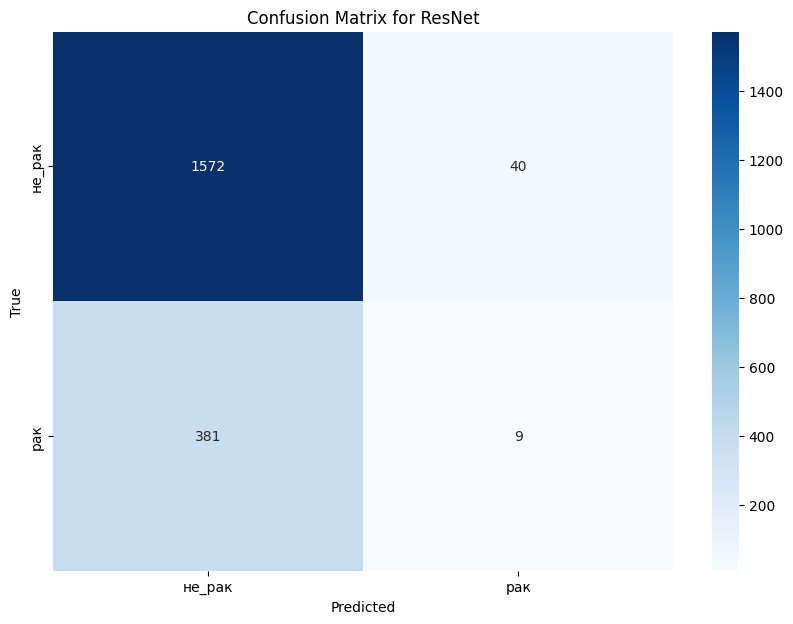

ROC-AUC for ResNet: 0.4977333460584081
EfficientNet-B0 model evaluation:
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 511ms/step - accuracy: 0.7945 - loss: 0.5078
EfficientNet-B0 accuracy: 0.8051947951316833
63/63 ━━━━━━━━━━━━━━━━━━━━ 43s 601ms/step
Classification Report for EfficientNet-B0:
               precision    recall  f1-score   support

      не_рак       0.81      1.00      0.89      1612
         рак       0.00      0.00      0.00       390

    accuracy                           0.81      2002
   macro avg       0.40      0.50      0.45      2002
weighted avg       0.65      0.81      0.72      2002



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


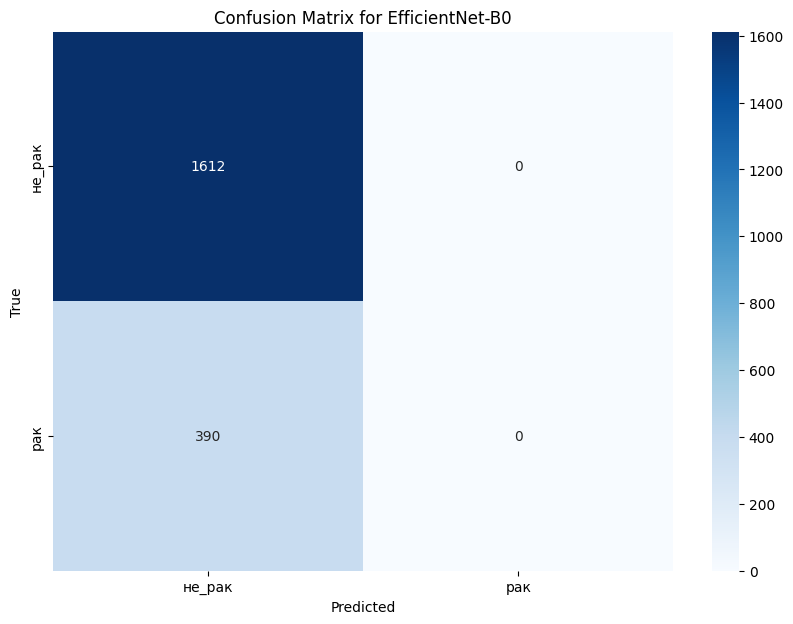

ROC-AUC for EfficientNet-B0: 0.4999650060444105
MobileNetV2 model evaluation:
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 528ms/step - accuracy: 0.8520 - loss: 0.3322
MobileNetV2 accuracy: 0.8531468510627747
63/63 ━━━━━━━━━━━━━━━━━━━━ 38s 553ms/step
Classification Report for MobileNetV2:
               precision    recall  f1-score   support

      не_рак       0.81      0.89      0.84      1612
         рак       0.22      0.13      0.16       390

    accuracy                           0.74      2002
   macro avg       0.51      0.51      0.50      2002
weighted avg       0.69      0.74      0.71      2002



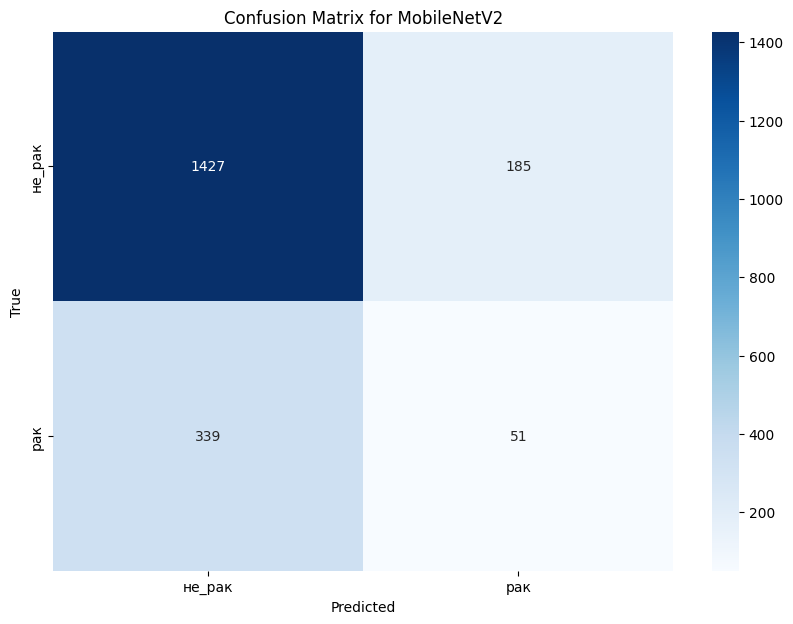

ROC-AUC for MobileNetV2: 0.5094133740535727
VGG16 model evaluation:
63/63 ━━━━━━━━━━━━━━━━━━━━ 36s 564ms/step - accuracy: 0.8193 - loss: 0.3437
VGG16 accuracy: 0.8346653580665588
63/63 ━━━━━━━━━━━━━━━━━━━━ 36s 553ms/step
Classification Report for VGG16:
               precision    recall  f1-score   support

      не_рак       0.80      0.89      0.84      1612
         рак       0.18      0.10      0.13       390

    accuracy                           0.74      2002
   macro avg       0.49      0.50      0.49      2002
weighted avg       0.68      0.74      0.71      2002



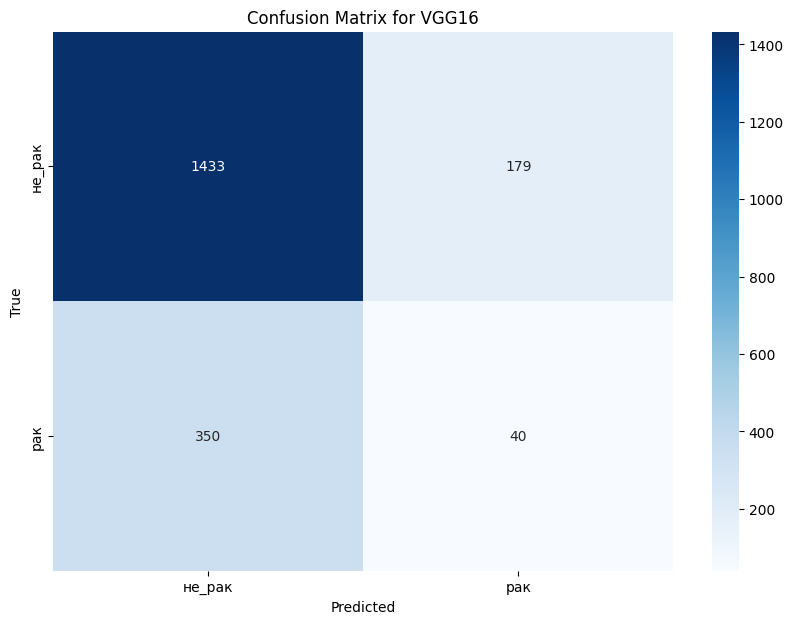

ROC-AUC for VGG16: 0.49760609531081


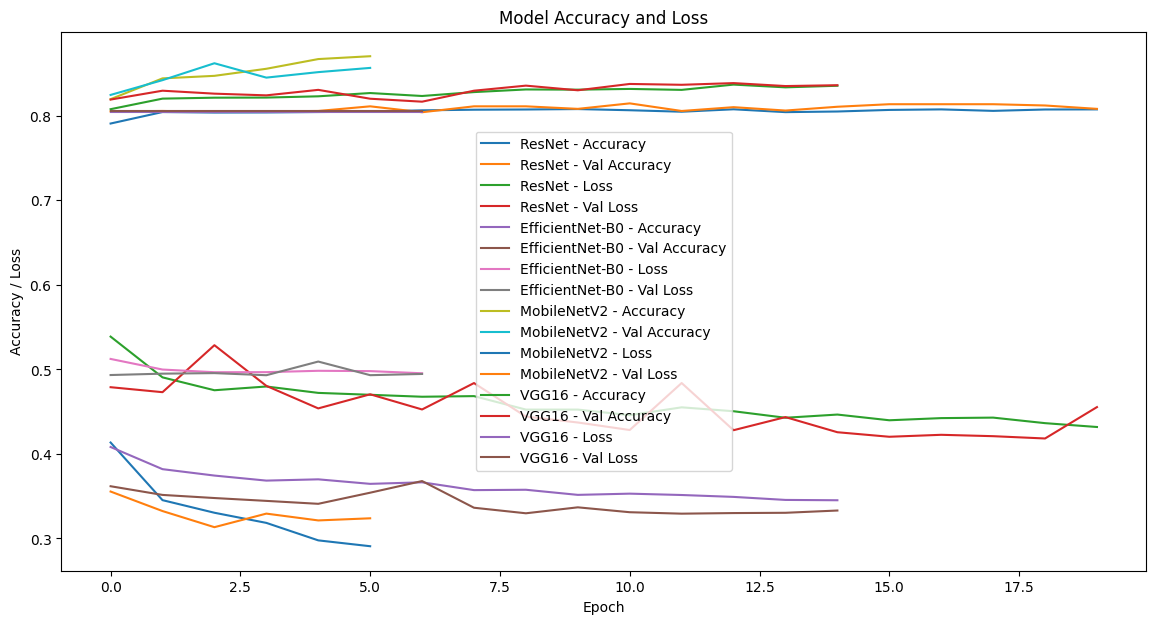

In [7]:
import os
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import ResNet50, EfficientNetB0, MobileNetV2, VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import pandas as pd
import shutil
from tensorflow.keras.callbacks import EarlyStopping

base_path = "/content/HAM10000/archive"
img_folder_1 = os.path.join(base_path, "HAM10000_images_part_1")
img_folder_2 = os.path.join(base_path, "HAM10000_images_part_2")
metadata_path = os.path.join(base_path, "HAM10000_metadata.csv")

df = pd.read_csv(metadata_path)

# Создаём общую папку для всех изображений
img_dir = "/content/all_images"
os.makedirs(img_dir, exist_ok=True)

# Скопируем изображения из двух папок в одну
for folder in [img_folder_1, img_folder_2]:
    for img_name in os.listdir(folder):
        src = os.path.join(folder, img_name)
        dst = os.path.join(img_dir, img_name)
        shutil.copy(src, dst)

# Чекаем
print("Общее количество изображений:", len(os.listdir(img_dir)))

# Добавляем полный путь к изображениям в датафрейм
df["image_path"] = df["image_id"].apply(lambda x: os.path.join(img_dir, x + ".jpg"))

# Снова чекаем
df = df[df["image_path"].apply(os.path.exists)]

# Перекодируем метки для бинарной классификации
# Добавляем новую колонку binary_label: 1 для "рак" (mel, bcc, akiec), 0 для "не рак"
risk_classes = ["mel", "bcc", "akiec"]
df["binary_label"] = df["dx"].apply(lambda x: 1 if x in risk_classes else 0)

# Создаём поддиректории для 2 классов (рак/не_рак) вместо 7
train_dir = "/content/train_data"
os.makedirs(train_dir, exist_ok=True)

for label in ["рак", "не_рак"]:
    os.makedirs(os.path.join(train_dir, label), exist_ok=True)

# Распределяем изображения по папкам классов
for _, row in df.iterrows():
    src = row["image_path"]
    dst = os.path.join(train_dir, "рак" if row["binary_label"] == 1 else "не_рак", os.path.basename(src))
    shutil.copy(src, dst)

print("Файлы распределены по 2 классам.")




# Генератор данных
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, rotation_range=20, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset="validation"
)

# Количество классов
num_classes = 2

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Функция для создания модели
def build_model(base_model):
    base_model.trainable = False
    inputs = tf.keras.Input(shape=(224, 224, 3)) # Создём входной тензор
    x = base_model(inputs, training=False) # Передаём входные данные в base_model
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)

    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

from tensorflow.keras.models import load_model

# Обучение ResNet
if os.path.exists('resnet_skin_binary_model.h5'):
    print("ResNet модель уже обучена. Загружаем из файла...")
    resnet_model = load_model('resnet_skin_binary_model.h5')
    resnet_history = None
else:
    print("Training ResNet model...")
    resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    resnet_model = build_model(resnet_base)
    resnet_history = resnet_model.fit(train_generator, validation_data=val_generator, epochs=20, callbacks=[early_stopping])
    resnet_model.save('resnet_skin_binary_model.h5')

# Обучение EfficientNet-B0
if os.path.exists('efficientnet_skin_binary_model.h5'):
    print("EfficientNet модель уже обучена. Загружаем из файла...")
    efficientnet_model = load_model('efficientnet_skin_binary_model.h5')
    efficientnet_history = None
else:
    print("Training EfficientNet-B0 model...")
    efficientnet_base = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    efficientnet_model = build_model(efficientnet_base)
    efficientnet_history = efficientnet_model.fit(train_generator, validation_data=val_generator, epochs=20, callbacks=[early_stopping])
    efficientnet_model.save('efficientnet_skin_binary_model.h5')

# Обучение MobileNetV2
if os.path.exists('mobilenetv2_skin_binary_model.h5'):
    print("MobileNetV2 модель уже обучена. Загружаем из файла...")
    mobilenetv2_model = load_model('mobilenetv2_skin_binary_model.h5')
    mobilenetv2_history = None
else:
    print("Training MobileNetV2 model...")
    mobilenetv2_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    mobilenetv2_model = build_model(mobilenetv2_base)
    mobilenetv2_history = mobilenetv2_model.fit(train_generator, validation_data=val_generator, epochs=20, callbacks=[early_stopping])
    mobilenetv2_model.save('mobilenetv2_skin_binary_model.h5')

# Обучение VGG16
if os.path.exists('vgg16_skin_binary_model.h5'):
    print("VGG16 модель уже обучена. Загружаем из файла...")
    vgg16_model = load_model('vgg16_skin_binary_model.h5')
    vgg16_history = None
else:
    print("Training VGG16 model...")
    vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    vgg16_model = build_model(vgg16_base)
    vgg16_history = vgg16_model.fit(train_generator, validation_data=val_generator, epochs=20, callbacks=[early_stopping])
    vgg16_model.save('vgg16_skin_binary_model.h5')

# Оцениваем качество
def evaluate_and_print_metrics(model, history, model_name):
    print(f"{model_name} model evaluation:")
    score = model.evaluate(val_generator)
    print(f"{model_name} accuracy: {score[1]}")

    # Прогнозирование на валидационном наборе
    y_pred = model.predict(val_generator)
    y_pred_classes = (y_pred > 0.5).astype(int).ravel()

    y_true = val_generator.classes

    # Метрики
    report = classification_report(y_true, y_pred_classes, target_names=["не_рак", "рак"])
    print(f"Classification Report for {model_name}:\n", report)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["не_рак", "рак"], yticklabels=["не_рак", "рак"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # ROC-AUC
    auc = roc_auc_score(y_true, y_pred)
    print(f"ROC-AUC for {model_name}: {auc}")

evaluate_and_print_metrics(resnet_model, resnet_history, "ResNet")
evaluate_and_print_metrics(efficientnet_model, efficientnet_history, "EfficientNet-B0")
evaluate_and_print_metrics(mobilenetv2_model, mobilenetv2_history, "MobileNetV2")
evaluate_and_print_metrics(vgg16_model, vgg16_history, "VGG16")

# строим графики
def plot_metrics(histories):
    plt.figure(figsize=(14, 7))

    for model_name, history in histories.items():
        plt.plot(history.history['accuracy'], label=f'{model_name} - Accuracy')
        plt.plot(history.history['val_accuracy'], label=f'{model_name} - Val Accuracy')
        plt.plot(history.history['loss'], label=f'{model_name} - Loss')
        plt.plot(history.history['val_loss'], label=f'{model_name} - Val Loss')

    plt.title('Model Accuracy and Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy / Loss')
    plt.legend()
    plt.show()

histories = {
    "ResNet": resnet_history,
    "EfficientNet-B0": efficientnet_history,
    "MobileNetV2": mobilenetv2_history,
    "VGG16": vgg16_history
}

plot_metrics(histories)

# Визуализируем случайные изображения и их предсказания
def plot_random_images_with_predictions(generator, model, num_images=10):
    image_paths = [os.path.join(generator.directory, f) for f in os.listdir(generator.directory) if f.endswith('.jpg') or f.endswith('.png')]
    random


Сделаем график более читабельным. Построим отдельно для каждой модели Accuracy + Val Accuracy, чтобы проверить есть ли переобучение. И сразу для четырёх моделей Val Accuracy

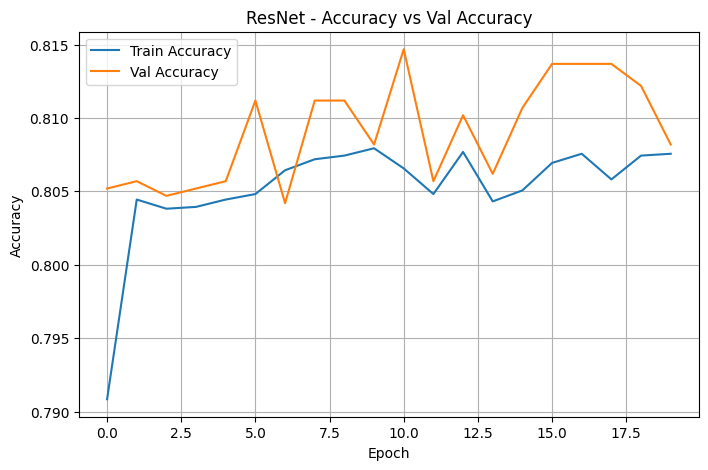

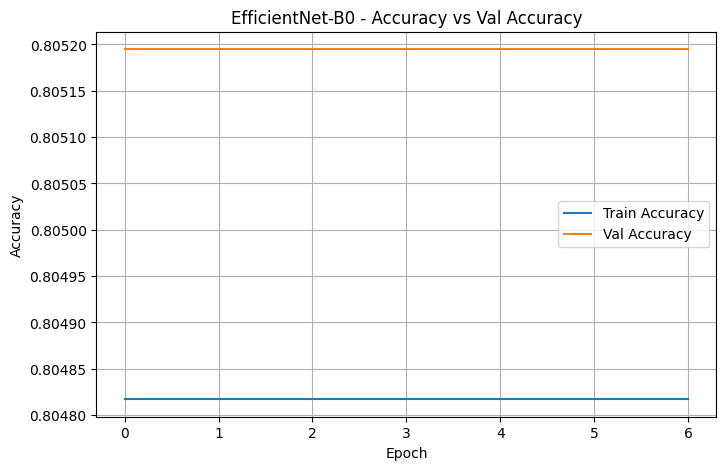

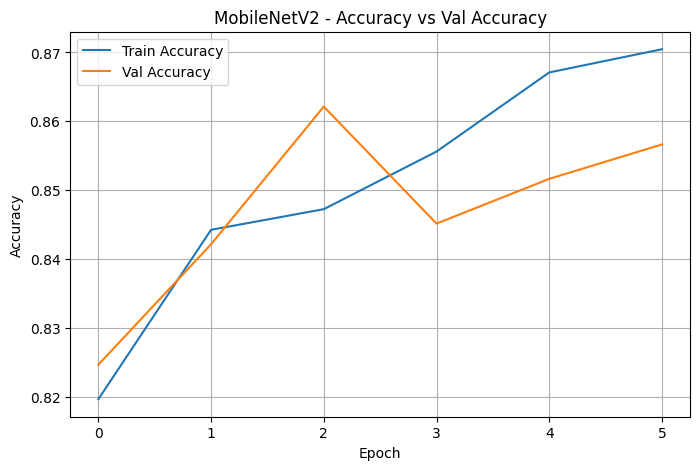

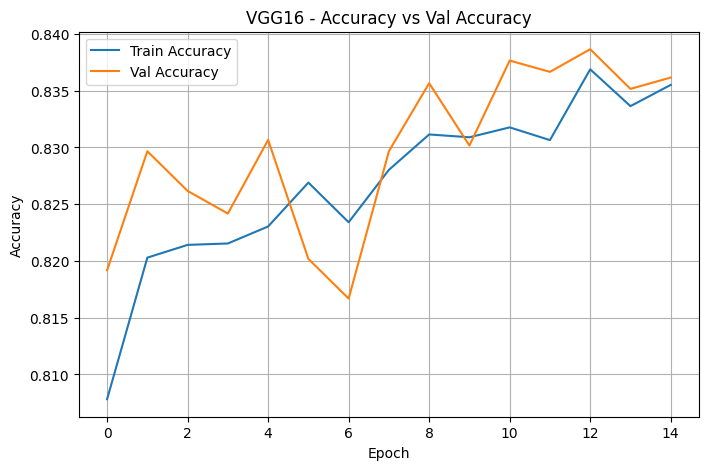

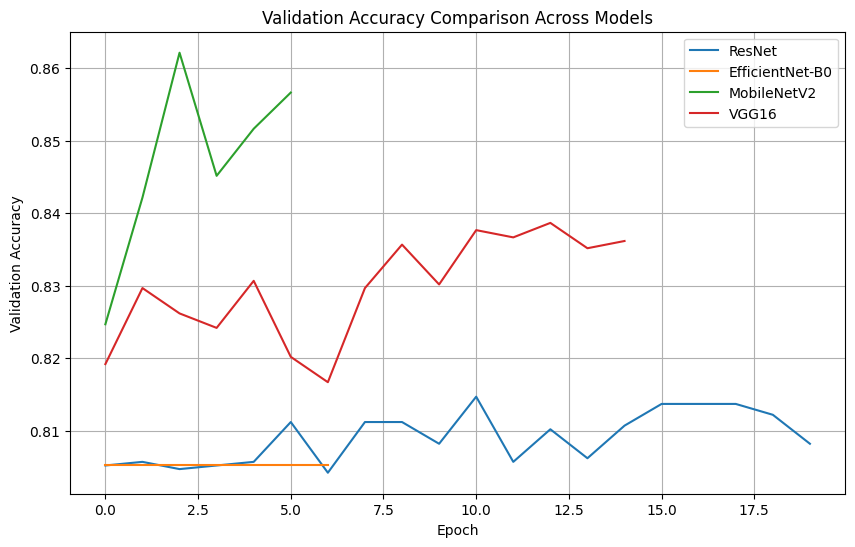

In [8]:
# Accuracy + Val Accuracy по отдельности для каждой модели
def plot_individual_model_accuracy(histories):
    for model_name, history in histories.items():
        if history is None:
            continue # если модель была загружена, а не обучалась, history = None
        plt.figure(figsize=(8, 5))
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Val Accuracy')
        plt.title(f'{model_name} - Accuracy vs Val Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)
        plt.show()

# Один график со всеми val_accuracy
def plot_all_val_accuracies(histories):
    plt.figure(figsize=(10, 6))
    for model_name, history in histories.items():
        if history is not None:
            plt.plot(history.history['val_accuracy'], label=f'{model_name}')
    plt.title('Validation Accuracy Comparison Across Models')
    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_individual_model_accuracy(histories)
plot_all_val_accuracies(histories)


Нарисуем Precision-Recall кривую для каждой модели

ResNet model evaluation:
63/63 ━━━━━━━━━━━━━━━━━━━━ 36s 577ms/step - accuracy: 0.8056 - loss: 0.4229
ResNet accuracy: 0.8141857981681824
63/63 ━━━━━━━━━━━━━━━━━━━━ 38s 612ms/step
Classification Report for ResNet:
               precision    recall  f1-score   support

      не_рак       0.80      0.97      0.88      1612
         рак       0.16      0.02      0.04       390

    accuracy                           0.79      2002
   macro avg       0.48      0.50      0.46      2002
weighted avg       0.68      0.79      0.72      2002



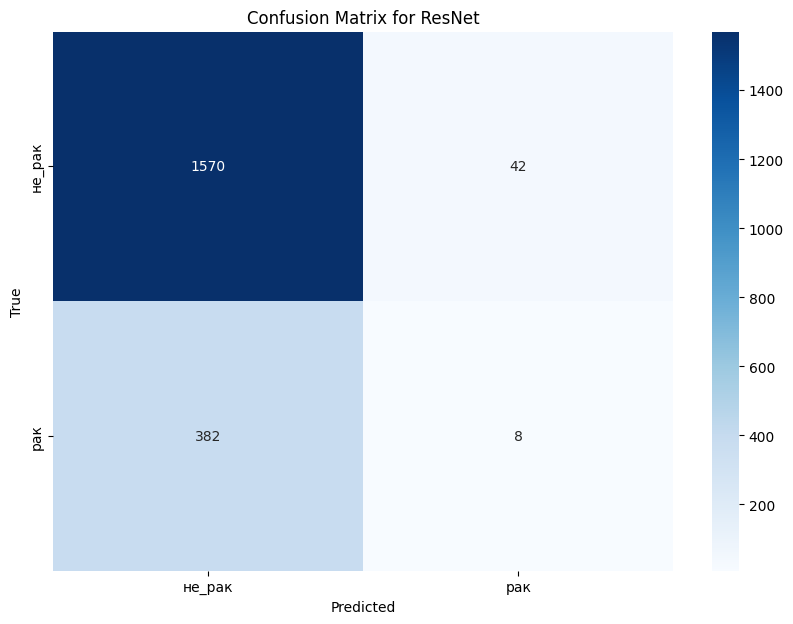

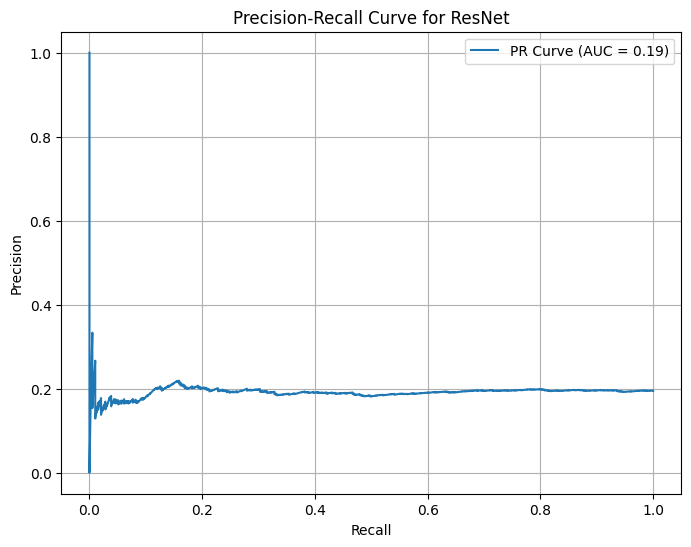

PR-AUC for ResNet: 0.19142639502091816
ROC-AUC for ResNet: 0.4947827193484762
Метрики для ResNet сохранены.
EfficientNet-B0 model evaluation:
63/63 ━━━━━━━━━━━━━━━━━━━━ 38s 597ms/step - accuracy: 0.8024 - loss: 0.4970
EfficientNet-B0 accuracy: 0.8051947951316833
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 505ms/step
Classification Report for EfficientNet-B0:
               precision    recall  f1-score   support

      не_рак       0.81      1.00      0.89      1612
         рак       0.00      0.00      0.00       390

    accuracy                           0.81      2002
   macro avg       0.40      0.50      0.45      2002
weighted avg       0.65      0.81      0.72      2002



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


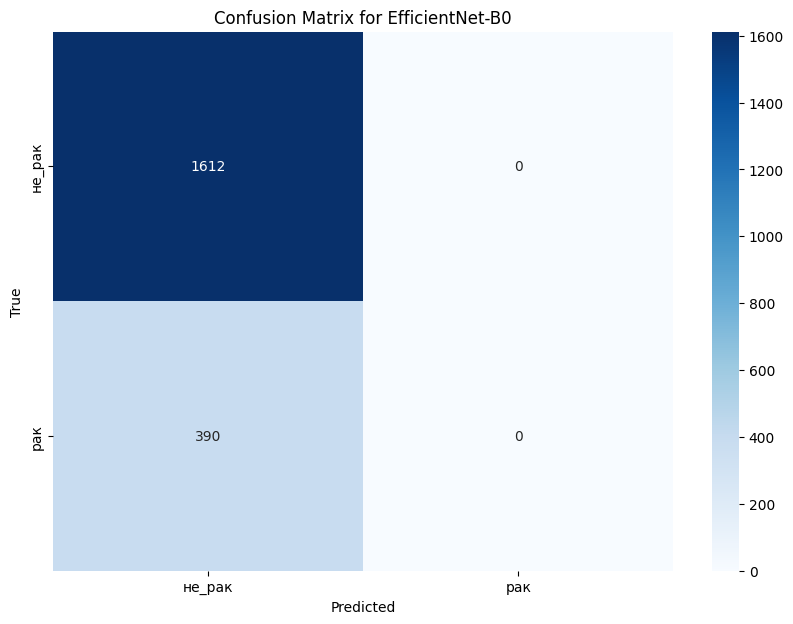

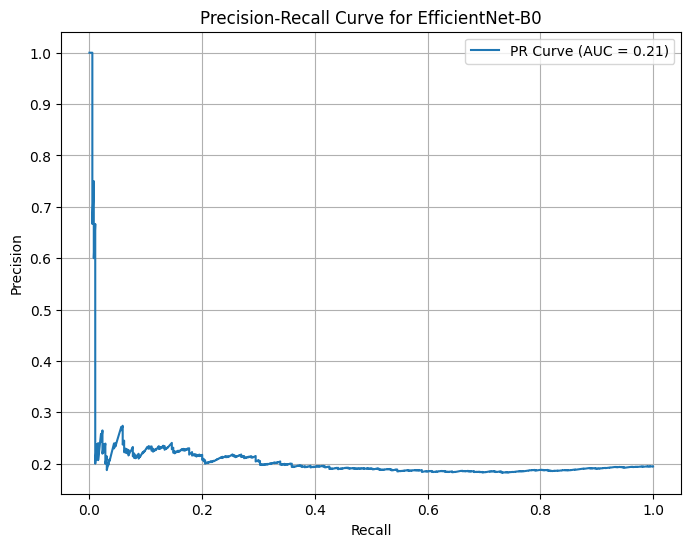

PR-AUC for EfficientNet-B0: 0.20545171995146508
ROC-AUC for EfficientNet-B0: 0.48865718648597056
Метрики для EfficientNet-B0 сохранены.
MobileNetV2 model evaluation:
63/63 ━━━━━━━━━━━━━━━━━━━━ 35s 548ms/step - accuracy: 0.8617 - loss: 0.3162
MobileNetV2 accuracy: 0.8566433787345886
63/63 ━━━━━━━━━━━━━━━━━━━━ 35s 563ms/step
Classification Report for MobileNetV2:
               precision    recall  f1-score   support

      не_рак       0.81      0.89      0.85      1612
         рак       0.24      0.14      0.18       390

    accuracy                           0.75      2002
   macro avg       0.52      0.52      0.51      2002
weighted avg       0.70      0.75      0.72      2002



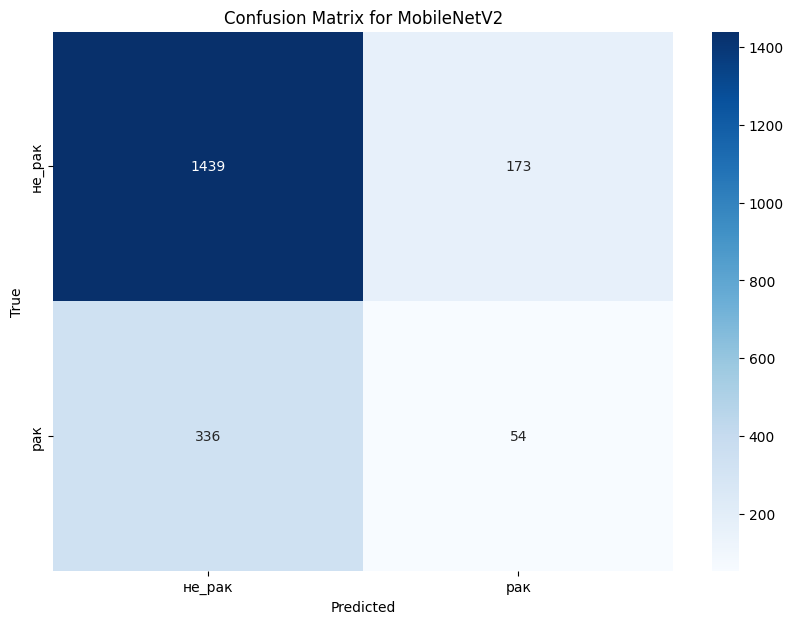

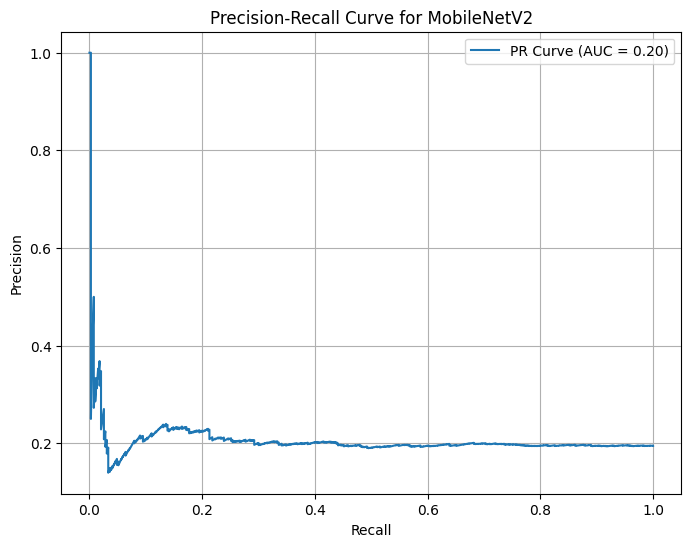

PR-AUC for MobileNetV2: 0.20484177814069165
ROC-AUC for MobileNetV2: 0.5085671565820449
Метрики для MobileNetV2 сохранены.
VGG16 model evaluation:
63/63 ━━━━━━━━━━━━━━━━━━━━ 36s 563ms/step - accuracy: 0.8425 - loss: 0.3180
VGG16 accuracy: 0.8386613130569458
63/63 ━━━━━━━━━━━━━━━━━━━━ 35s 546ms/step
Classification Report for VGG16:
               precision    recall  f1-score   support

      не_рак       0.81      0.90      0.85      1612
         рак       0.22      0.12      0.16       390

    accuracy                           0.75      2002
   macro avg       0.51      0.51      0.50      2002
weighted avg       0.69      0.75      0.71      2002



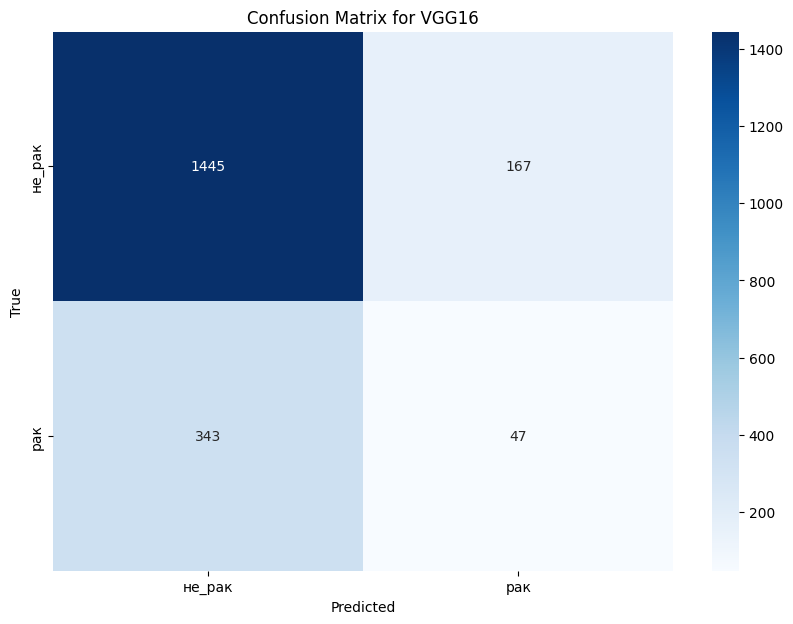

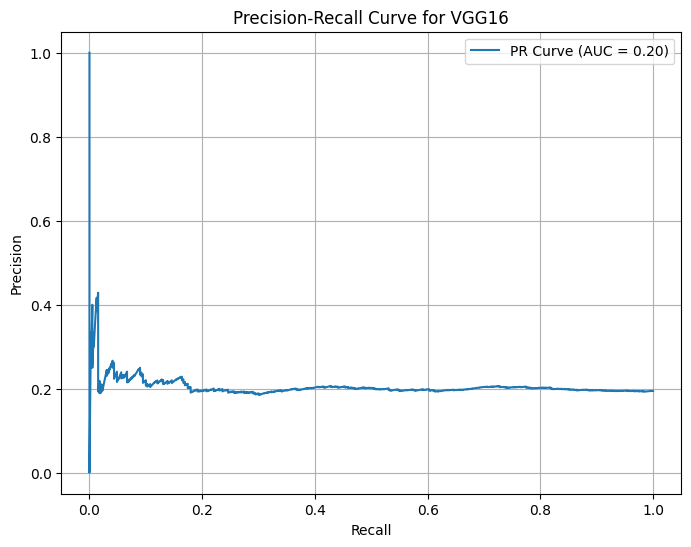

PR-AUC for VGG16: 0.20390352223396033
ROC-AUC for VGG16: 0.5128173315518229
Метрики для VGG16 сохранены.


In [9]:
from sklearn.metrics import precision_recall_curve, auc

def evaluate_and_print_metrics(model, history, model_name):
    print(f"{model_name} model evaluation:")
    score = model.evaluate(val_generator)
    print(f"{model_name} accuracy: {score[1]}")

    y_pred = model.predict(val_generator)
    y_pred_classes = (y_pred > 0.5).astype(int).ravel()
    y_true = val_generator.classes

    report = classification_report(y_true, y_pred_classes, target_names=["не_рак", "рак"])
    print(f"Classification Report for {model_name}:\n", report)

    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["не_рак", "рак"], yticklabels=["не_рак", "рак"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.savefig(f"/content/drive/My Drive/Курсовая работа/{model_name}_confusion_matrix.png")
    plt.show()

    # Добавляем Precision-Recall кривую
    precision, recall, _ = precision_recall_curve(y_true, y_pred)
    pr_auc = auc(recall, precision)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {model_name}')
    plt.legend()
    plt.grid(True)
    plt.savefig(f"/content/drive/My Drive/Курсовая работа/{model_name}_pr_curve.png")
    plt.show()
    print(f"PR-AUC for {model_name}: {pr_auc}")

    auc_score = roc_auc_score(y_true, y_pred)  # Добавим ROC-AUC позже
    print(f"ROC-AUC for {model_name}: {auc_score}")

    with open(f"/content/drive/My Drive/Курсовая работа/{model_name}_metrics.txt", 'w') as f:
        f.write(f"{model_name} model evaluation:\n")
        f.write(f"Accuracy: {score[1]}\n")
        f.write(f"Classification Report:\n{report}\n")
        f.write(f"PR-AUC: {pr_auc}\n")
        f.write(f"ROC-AUC: {auc_score}\n")
    print(f"Метрики для {model_name} сохранены.")

# Вызов для каждой модели
evaluate_and_print_metrics(resnet_model, resnet_history, "ResNet")
evaluate_and_print_metrics(efficientnet_model, efficientnet_history, "EfficientNet-B0")
evaluate_and_print_metrics(mobilenetv2_model, mobilenetv2_history, "MobileNetV2")
evaluate_and_print_metrics(vgg16_model, vgg16_history, "VGG16")